Time point: 12
Survival probability: 0.9700
Standard deviation: 0.0133

Time point: 36
Survival probability: 0.8361
Standard deviation: 0.0329

Time point: 60
Survival probability: 0.7502
Standard deviation: 0.0427



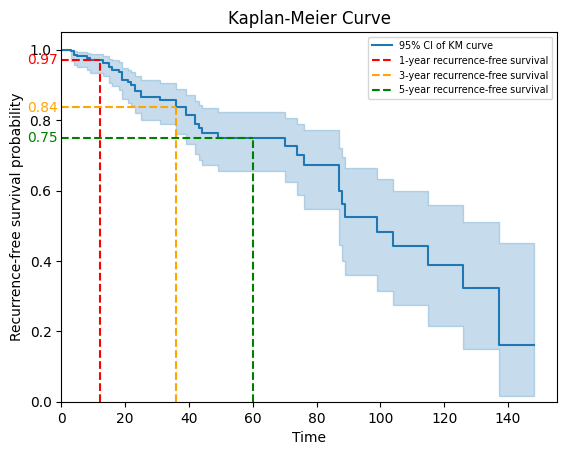

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# 加载数据
data = pd.read_csv('dataset.csv')

# 绘制 Kaplan-Meier 曲线
def plot_km_curve(data, duration_col, event_col, time_points, output_path):
    kmf = KaplanMeierFitter()
    kmf.fit(data[duration_col], event_observed=data[event_col])
    
    # 绘制生存曲线但不显示图例
    ax = kmf.plot_survival_function(ci_show=True, legend=False)
    
    colors = ['red', 'orange', 'green']
    labels = ['1-year recurrence-free survival', '3-year recurrence-free survival', '5-year recurrence-free survival']
    
    for i, time_point in enumerate(time_points):
        # 获取特定时间点的生存概率
        survival_prob = kmf.survival_function_at_times(time_point).values[0]
        
        # 获取置信区间
        lower_ci = kmf.confidence_interval_.loc[time_point, 'KM_estimate_lower_0.95']
        upper_ci = kmf.confidence_interval_.loc[time_point, 'KM_estimate_upper_0.95']
        
        # 计算标准差
        survival_std = (upper_ci - lower_ci) / (2 * 1.96)  # Assuming a 95% CI, 1.96 is the z-value for 95%

        print(f"Time point: {time_point}")
        print(f"Survival probability: {survival_prob:.4f}")
        print(f"Standard deviation: {survival_std:.4f}\n")
        
        # 绘制从特定时间点往左到纵坐标的垂直线和往下到横坐标的水平线
        ax.plot([time_point, time_point], [0, survival_prob], linestyle='--', color=colors[i])
        ax.plot([0, time_point], [survival_prob, survival_prob], linestyle='--', color=colors[i])
        
        # 在纵坐标左侧标注生存概率，使其与纵坐标的数字对齐
        ax.text(-1, survival_prob, f'{survival_prob:.2f}', verticalalignment='center', color=colors[i], horizontalalignment='right')
    
    # 手动添加图例并调整字体大小
    handles, labels = ax.get_legend_handles_labels()
    handles[0].set_label('95% CI of KM curve')
    handles.extend([
        plt.Line2D([0], [0], color='red', linestyle='--', label='1-year recurrence-free survival'),
        plt.Line2D([0], [0], color='orange', linestyle='--', label='3-year recurrence-free survival'),
        plt.Line2D([0], [0], color='green', linestyle='--', label='5-year recurrence-free survival')
    ])
    ax.legend(handles=handles, loc='upper right', fontsize='x-small')
    
    plt.title('Kaplan-Meier Curve')
    plt.xlabel('Time')
    plt.ylabel('Recurrence-free survival probability')
    plt.grid(False)
    
    # 设置坐标轴限制，确保0点在坐标原点
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    
    # 保存图像为TIFF格式
#    plt.savefig(output_path, format='tiff', dpi=300)
    plt.savefig(output_path, format='png')
    plt.show()

# 调用函数绘制 Kaplan-Meier 曲线，并在时间为12、36、60的点添加到横纵坐标的线
plot_km_curve(data, 'follow_Up', 'outcome', time_points=[12, 36, 60], output_path='kaplan_meier_curve.tiff')
#plot_km_curve(data, 'follow_Up', 'outcome', time_points=[12, 36, 60], output_path='kaplan_meier_curve.png')
